# DICODING SUBMISSION

## Rock Paper Scissors Classifier

**Name : Idris Darmawan Pane**

**Email : panedeniro0@gmail.com**

Dicoding profile : https://www.dicoding.com/users/blacksaga21

In [3]:
#Import tensorflow
import tensorflow as tf

In [2]:
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-02-25 00:22:24--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.39MB/s    in 43s     

2021-02-25 00:23:09 (7.08 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



**1. EXTRACTIG/UNZIP THE ZIP FILE**

In [7]:
import zipfile,os
local_zip = "rockpaperscissors.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/")
zip_ref.close()

**2. SPLIT THE DATASET USING PYTHON LIBRARY SPLIT-FOLDER**

**Training = 60% and Validation = 40%**

In [13]:
!pip install split-folders
import splitfolders

In [15]:
splitfolders.ratio("/tmp/rockpaperscissors/rps-cv-images", output="/tmp/rockpaperscissors/split", seed=1337, ratio=(0.6, 0.4))

Copying files: 2188 files [00:00, 4028.33 files/s]


**3. THE DIRECTORY**

In [16]:
base_dir = '/tmp/rockpaperscissors/split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [17]:
os.listdir(base_dir)

['val', 'train']

In [18]:
#Directory for training
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

#Directory for validation
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

**4. IMAGE OVERVIEW**

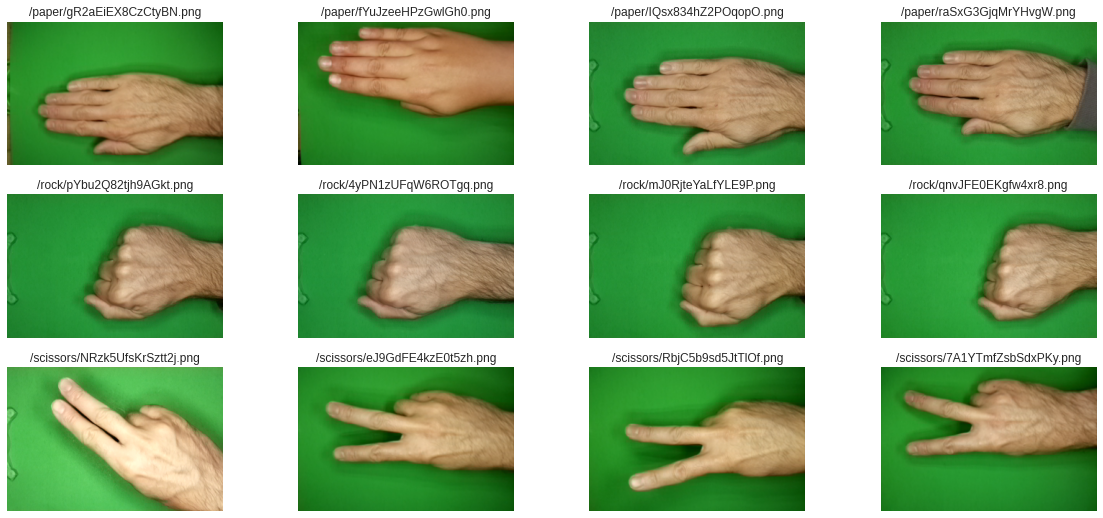

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image
plt.style.use("seaborn")
total = 4                                                                       
index = np.random.randint(20)                                                    

plt.figure(figsize=(5*total, 9))

list_paper = [os.path.join('/tmp/rockpaperscissors/paper', name) for name in os.listdir('/tmp/rockpaperscissors/paper')[index:index+total]]
list_rock = [os.path.join('/tmp/rockpaperscissors/rock', name) for name in os.listdir('/tmp/rockpaperscissors/rock')[index:index+total]]
list_scissors = [os.path.join('/tmp/rockpaperscissors/scissors', name) for name in os.listdir('/tmp/rockpaperscissors/scissors')[index:index+total]]

for i, path in enumerate(list_paper+list_rock+list_scissors):
  plt.subplot(3, total, i+1)
  plt.axis('off')

  plt.title(path.replace('/tmp/rockpaperscissors', ''))
  img = plt_image.imread(path)
  plt.imshow(img)

**5. IMAGE DATA GENERATOR**

In [22]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

In [27]:
#Load training data
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

#Load testing data
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [26]:
train_gen = train_datagen.flow_from_directory(
        train_dir,  # Training Directory
        target_size=(150, 150),  # Changing The Picture Resolution
        batch_size=4,
        # Multiclass problem, so i'm using "categorical" class mode
        class_mode='categorical')
 
val_gen = test_datagen.flow_from_directory(
        validation_dir, # Validation Directory
        target_size=(150, 150), # Changing the picture resolution
        batch_size=4, # Multiclass problem, so i'm using "categorical" class mode
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


**6. INITIALISING SEQUENTIAL MODEL AND ADDING LAYERS**

In [30]:
model = tf.keras.models.Sequential([
    #First Convolution Layer                                
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Second Convolution Layer
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Third Convolution layer
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Fourth convolution Layer
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    #First Hidden layers
    tf.keras.layers.Dense(128, activation="relu"),
    #Secon Hidden Layers
    tf.keras.layers.Dense(512, activation="relu"),
    
    #Output Layer
    tf.keras.layers.Dense(3, activation="softmax"),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

**7. MODEL COMPILING**

In [49]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

**8. MODEL TRAINING**

In [50]:
history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/50
10/10 - 5s - loss: 0.1825 - accuracy: 0.9500 - val_loss: 0.5509 - val_accuracy: 0.9000
Epoch 2/50
10/10 - 3s - loss: 0.6564 - accuracy: 0.9250 - val_loss: 0.5538 - val_accuracy: 0.8500
Epoch 3/50
10/10 - 4s - loss: 0.0921 - accuracy: 0.9750 - val_loss: 0.5969 - val_accuracy: 0.9000
Epoch 4/50
10/10 - 3s - loss: 0.5677 - accuracy: 0.9250 - val_loss: 0.3866 - val_accuracy: 0.9000
Epoch 5/50
10/10 - 3s - loss: 0.0412 - accuracy: 0.9750 - val_loss: 6.6710e-04 - val_accuracy: 1.0000
Epoch 6/50
10/10 - 4s - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/50
10/10 - 4s - loss: 0.4352 - accuracy: 0.8500 - val_loss: 0.9574 - val_accuracy: 0.9000
Epoch 8/50
10/10 - 3s - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.9334 - val_accuracy: 0.8500
Epoch 9/50
10/10 - 3s - loss: 0.3314 - accuracy: 0.9000 - val_loss: 0.1708 - val_accuracy: 0.9000
Epoch 10/50
10/10 - 3s - loss: 0.0480 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 11/50
10/

**9. SHOWING TRAINING AND VALIDATION ACCURACY USING MATPLOTLIB**

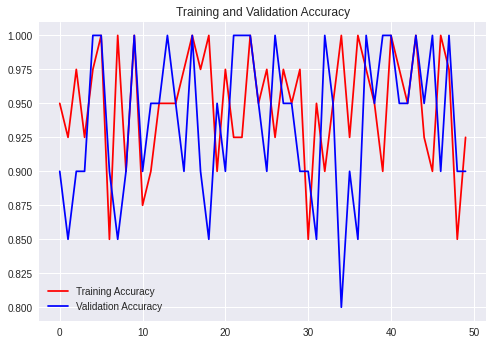

<Figure size 576x396 with 0 Axes>

In [51]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend(loc=0)
plt.figure()

plt.show()

**10. MODEL PREDICTION**

Saving 4hvoLYY28SGuZCEI.png to 4hvoLYY28SGuZCEI.png
4hvoLYY28SGuZCEI.png
scissors


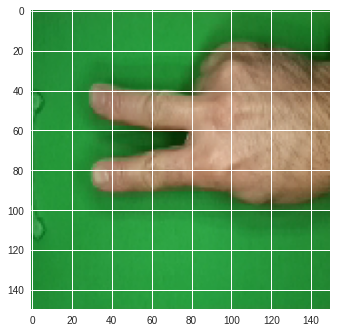

In [53]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')